In [ ]:
# (그래프에 한글이 깨질경우) 아래 코드 실행 > '런타임: 세션 다시시작' 실행
!pip install matplotlib -U
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## **라이브러리 다운로드 및 불러오기**

In [ ]:
# 라이브러리 불러오기: 데이터 핸들링
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm, trange

# 라이브러리 불러오기: 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # plot "-" 부호 표기 설정

In [ ]:
# 라이브러리 불러오기: 경고 안내 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

## **데이터**
  - 데이터명: 온라인 식료품 데이터(Relay Foods)
  - 출처: 캐글의 오픈 데이터(https://github.com/springcoil/marsmodelling)

In [ ]:
# 데이터 불러오기
df = pd.read_excel('https://github.com/springcoil/marsmodelling/blob/master/relay-foods.xlsx?raw=true', sheet_name='Purchase Data - Full Study')
df.columns = ['주문ID', '주문날짜', '고객ID', '총청구액', '공용ID', '픽업ID', '픽업날짜']

print(df.shape)
df.tail()

(2891, 7)


,주문ID,주문날짜,고객ID,총청구액,공용ID,픽업ID,픽업날짜
2886,3220,2010-03-08,393616,60.0155,AWNXG,15,2010-03-08
2887,3192,2010-03-07,394290,45.4300,AKGQT,12,2010-03-10
2888,3193,2010-03-07,394346,14.2100,2B47R,15,2010-03-08
2889,3207,2010-03-08,395039,34.6200,H6E23,4,2010-03-08
2890,3231,2010-03-08,396551,127.2800,9SBZ8,3,2010-03-09


## **데이터 전처리**

In [ ]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   주문ID    2891 non-null   int64         
 1   주문날짜    2891 non-null   datetime64[ns]
 2   고객ID    2891 non-null   int64         
 3   총청구액    2891 non-null   float64       
 4   공용ID    2891 non-null   object        
 5   픽업ID    2891 non-null   int64         
 6   픽업날짜    2891 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 158.2+ KB


In [ ]:
# 데이터 기초통계 확인
df.describe(include='all')

,주문ID,주문날짜,고객ID,총청구액,공용ID,픽업ID,픽업날짜
count,2891.000000,2891,2891.000000,2891.000000,2891,2891.000000,2891
unique,NaN,NaN,NaN,NaN,2891,NaN,NaN
top,NaN,NaN,NaN,NaN,TRQKD,NaN,NaN
freq,NaN,NaN,NaN,NaN,1,NaN,NaN
mean,1763.644414,2009-10-24 08:57:56.720857856,85586.842269,59.947184,NaN,6.848495,2009-10-25 06:48:56.285022464
min,256.000000,2009-01-06 00:00:00,47.000000,1.390000,NaN,2.000000,2009-01-06 00:00:00
25%,1021.500000,2009-08-07 00:00:00,5534.000000,22.965000,NaN,4.000000,2009-08-07 00:00:00
50%,1778.000000,2009-11-15 00:00:00,42270.000000,44.810000,NaN,5.000000,2009-11-16 00:00:00
75%,2504.500000,2010-01-26 00:00:00,132044.000000,79.600000,NaN,7.000000,2010-01-27 00:00:00
max,3234.000000,2010-03-09 00:00:00,396551.000000,690.982700,NaN,20.000000,2010-03-10 00:00:00


In [ ]:
#주문 일자별 건수
df['주문날짜'].value_counts().sort_index()

,count
주문날짜,
2009-01-06,4
2009-01-11,1
2009-01-12,1
2009-01-13,4
2009-01-14,3
...,...
2010-03-05,23
2010-03-06,4
2010-03-07,13


In [ ]:
#픽업 일자별 건수
df['픽업날짜'].value_counts().sort_index()

,count
픽업날짜,
2009-01-06,2
2009-01-07,1
2009-01-08,1
2009-01-12,2
2009-01-13,3
...,...
2010-03-04,18
2010-03-05,35
2010-03-08,31


In [ ]:
# 변수 중복여부 확인
print(len(df['고객ID']))
print(len(list(set(list(df['고객ID'])))))

2891
757


In [ ]:
# 결측치 확인
df.isnull().sum()

,0
주문ID,0
주문날짜,0
고객ID,0
총청구액,0
공용ID,0
픽업ID,0
픽업날짜,0


## **데이터 전처리**


In [ ]:
# 불필요한 데이터 변수 제거
df.drop(['총청구액', '공용ID','픽업ID','픽업날짜'], axis=1,inplace=True)

# 변수 생성: strftime 함수 활용
df['주문날짜2'] = df['주문날짜'].dt.strftime('%y-%m')

# 변수명 변경
df.columns = ['주문ID', '주문날짜(YMD)', '고객ID', '주문날짜(YM)']

print(df.shape)
df.head()

(2891, 4)


,주문ID,주문날짜(YMD),고객ID,주문날짜(YM)
0,262,2009-01-11,47,09-01
1,278,2009-01-20,47,09-01
2,294,2009-02-03,47,09-02
3,301,2009-02-06,47,09-02
4,302,2009-02-06,47,09-02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   주문ID       2891 non-null   int64         
 1   주문날짜(YMD)  2891 non-null   datetime64[ns]
 2   고객ID       2891 non-null   int64         
 3   주문날짜(YM)   2891 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 90.5+ KB


In [ ]:
  # 최초 주문날짜 데이터 생성

# 고객ID 변수로 인덱스 고정
df.set_index('고객ID',inplace=True)

# min함수를 통해 고객별 최초 주문일자 변수 생성
FirstOrder = df.groupby(df.index)['주문날짜(YM)'].min()
df['최초주문날짜(YM)'] = FirstOrder
df.reset_index(inplace=True)

df

,고객ID,주문ID,주문날짜(YMD),주문날짜(YM),최초주문날짜(YM)
0,47,262,2009-01-11,09-01,09-01
1,47,278,2009-01-20,09-01,09-01
2,47,294,2009-02-03,09-02,09-01
3,47,301,2009-02-06,09-02,09-01
4,47,302,2009-02-06,09-02,09-01
...,...,...,...,...,...
2886,393616,3220,2010-03-08,10-03,10-03
2887,394290,3192,2010-03-07,10-03,10-03
2888,394346,3193,2010-03-07,10-03,10-03
2889,395039,3207,2010-03-08,10-03,10-03


In [ ]:
df['주문날짜(YMD)']

,주문날짜(YMD)
0,2009-01-11
1,2009-01-20
2,2009-02-03
3,2009-02-06
4,2009-02-06
...,...
2886,2010-03-08
2887,2010-03-07
2888,2010-03-07
2889,2010-03-08


In [ ]:
# 최초주문날짜에 따른 주문날짜의 개별 방문 고객 수 확인
grouped = df.groupby(['최초주문날짜(YM)', '주문날짜(YM)'])
cohorts = grouped['고객ID'].nunique()                         # nunique 함수: 고유 값들의 수 확인
cohorts = cohorts.reset_index()
cohorts.rename({'고객ID':'총고객수'},axis=1,inplace=True)
cohorts

,최초주문날짜(YM),주문날짜(YM),총고객수
0,09-01,09-01,22
1,09-01,09-02,8
2,09-01,09-03,10
3,09-01,09-04,9
4,09-01,09-05,10
...,...,...,...
114,10-01,10-02,50
115,10-01,10-03,26
116,10-02,10-02,100
117,10-02,10-03,19


In [ ]:
# 코호튼 번호 확인
Coh_num = cohorts['최초주문날짜(YM)'].value_counts().sort_index()
Coh_num

,count
최초주문날짜(YM),
09-01,15
09-02,13
09-03,13
09-04,12
09-05,11
09-06,10
09-07,9
09-08,8
09-09,7


In [ ]:
# 09년 1월 코호튼 구간은 15개이며, 이후 일자는 14, 13, 12, 11... 순으로 구성되어야 한다.
# 하지만 본 분석 결과를 보면 09년 2월이 14개가 아닌 13개이므로 이를 보완할 필요성을 확인했다.

____

In [ ]:
# 데이터 상세 확인: 09년 02월
cohorts[cohorts['최초주문날짜(YM)']=='09-02'].tail(13)

,최초주문날짜(YM),주문날짜(YM),총고객수
15,09-02,09-02,15
16,09-02,09-03,3
17,09-02,09-04,5
18,09-02,09-05,1
19,09-02,09-06,4
20,09-02,09-07,4
21,09-02,09-08,4
22,09-02,09-09,5
23,09-02,09-10,5
24,09-02,09-11,4


In [ ]:
# 데이터 상세 확인: 09년 03월
cohorts[cohorts['최초주문날짜(YM)']=='09-03'].tail(13)

,최초주문날짜(YM),주문날짜(YM),총고객수
28,09-03,09-03,13
29,09-03,09-04,4
30,09-03,09-05,5
31,09-03,09-06,4
32,09-03,09-07,1
33,09-03,09-08,2
34,09-03,09-09,2
35,09-03,09-10,3
36,09-03,09-11,2
37,09-03,09-12,1


In [ ]:
# 데이터 상세 확인: 09년 04월
cohorts[cohorts['최초주문날짜(YM)']=='09-04'].tail(12)

,최초주문날짜(YM),주문날짜(YM),총고객수
41,09-04,09-04,39
42,09-04,09-05,13
43,09-04,09-06,10
44,09-04,09-07,13
45,09-04,09-08,6
46,09-04,09-09,7
47,09-04,09-10,4
48,09-04,09-11,6
49,09-04,09-12,2
50,09-04,10-01,4


In [ ]:
# 데이터 상세 확인: 09년 05월
cohorts[cohorts['최초주문날짜(YM)']=='09-05'].tail(11)

,최초주문날짜(YM),주문날짜(YM),총고객수
53,09-05,09-05,50
54,09-05,09-06,13
55,09-05,09-07,12
56,09-05,09-08,5
57,09-05,09-09,4
58,09-05,09-10,6
59,09-05,09-11,3
60,09-05,09-12,5
61,09-05,10-01,5
62,09-05,10-02,4


In [ ]:
# 추가적으로 어떤 데이터를 보완해야하는지 확인하고자 '최초주문날짜'를 기준으로 주문날짜 09년 2월이 누락되었음을 확인했다.
# 따라서, 데이터 전처리 과정을 통해 누락된 날짜에 대한 임시 데이터를 생성하고자 한다.

___

In [ ]:
# 코호튼 번호 부족문제 해결

# 09년 2월 최초주문날짜에는 10년 3월 데이터가 존재하지 않아 생성
cohorts.loc[cohorts.shape[0],'최초주문날짜(YM)']='09-02'
cohorts.loc[cohorts.shape[0]-1,'주문날짜(YM)']='10-03'
cohorts.loc[cohorts.shape[0]-1,'총고객수']=0
cohorts.sort_values(['최초주문날짜(YM)','주문날짜(YM)'],inplace=True)

cohorts.tail()

,최초주문날짜(YM),주문날짜(YM),총고객수
114,10-01,10-02,50.0
115,10-01,10-03,26.0
116,10-02,10-02,100.0
117,10-02,10-03,19.0
118,10-03,10-03,24.0


In [ ]:
# 데이터 추가 여부 확인: 09년 02월
cohorts[cohorts['최초주문날짜(YM)']=='09-02'].tail(14)

,최초주문날짜(YM),주문날짜(YM),총고객수
15,09-02,09-02,15.0
16,09-02,09-03,3.0
17,09-02,09-04,5.0
18,09-02,09-05,1.0
19,09-02,09-06,4.0
20,09-02,09-07,4.0
21,09-02,09-08,4.0
22,09-02,09-09,5.0
23,09-02,09-10,5.0
24,09-02,09-11,4.0


In [ ]:
# 코호튼 번호 재확인
Coh_num=cohorts['최초주문날짜(YM)'].value_counts().sort_index()
Coh_num

,count
최초주문날짜(YM),
09-01,15
09-02,14
09-03,13
09-04,12
09-05,11
09-06,10
09-07,9
09-08,8
09-09,7


## **코호트 분석(Cohort Analysis): 고객 유지율**

In [ ]:
# 코호튼 시간에 따른 총고객수 변수 생성

# 리스트 정의
Coh_list = []

# 코호튼 시간 생성 및 삽입
for i in Coh_num:
  for j in range(0, i):
    Coh_list.append(j)

cohorts['기간(Cohort)'] = Coh_list

# 코호튼 시간을 결합한 테이블 생성
cohorts.set_index(['최초주문날짜(YM)','기간(Cohort)'],inplace=True)
cohorts

주문날짜(YM)   총고객수
최초주문날짜(YM) 기간(Cohort)                
09-01      0             09-01   22.0
           1             09-02    8.0
           2             09-03   10.0
           3             09-04    9.0
           4             09-05   10.0
...                        ...    ...
10-01      1             10-02   50.0
           2             10-03   26.0
10-02      0             10-02  100.0
           1             10-03   19.0
10-03      0             10-03   24.0

[120 rows x 2 columns]

In [ ]:
# 현황 식별을 위해 테이블 형태로 변경

cohorts = cohorts['총고객수'].unstack(1)   # unstack(1)함수를 통해 두번 째 인덱스를 컬럼으로 이동(기간(Cohort))
cohorts

기간(Cohort),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
최초주문날짜(YM),,,,,,,,,,,,,,,
09-01,22.0,8.0,10.0,9.0,10.0,8.0,8.0,7.0,7.0,7.0,7.0,8.0,11.0,7.0,6.0
09-02,15.0,3.0,5.0,1.0,4.0,4.0,4.0,5.0,5.0,4.0,3.0,3.0,5.0,0.0,NaN
09-03,13.0,4.0,5.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0,NaN,NaN
09-04,39.0,13.0,10.0,13.0,6.0,7.0,4.0,6.0,2.0,4.0,3.0,2.0,NaN,NaN,NaN
09-05,50.0,13.0,12.0,5.0,4.0,6.0,3.0,5.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN
09-06,32.0,15.0,9.0,6.0,7.0,5.0,3.0,3.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
09-07,50.0,23.0,13.0,10.0,11.0,10.0,11.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
09-08,31.0,11.0,9.0,7.0,6.0,8.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-09,37.0,15.0,14.0,8.0,13.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 누락된 데이터를 보완하여 코호튼 분석을 수행하고자 최초주문날짜의 코호튼 기간별 총 고객 수를 확인했다.

# 코호튼 분석을 위해서 순방문자를 확인해야하여 데이터 구조를 변형했다.
# 이를 통해, 09년 1월 최초주문한 고객은 22명으로, 1달 후 8명, 2달 후 10명 등을 확인할 수 있게 되었다.

___

In [ ]:
# 고객 변화를 직관적으로 식별하고자 비율로 변경

user_retention = cohorts.divide(cohorts[0], axis=0)  # 특정 데이터를 첫번 째 기간의 순방문자 수로 나눔
user_retention

기간(Cohort),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
최초주문날짜(YM),,,,,,,,,,,,,,,
09-01,1.0,0.363636,0.454545,0.409091,0.454545,0.363636,0.363636,0.318182,0.318182,0.318182,0.318182,0.363636,0.500000,0.318182,0.272727
09-02,1.0,0.200000,0.333333,0.066667,0.266667,0.266667,0.266667,0.333333,0.333333,0.266667,0.200000,0.200000,0.333333,0.000000,NaN
09-03,1.0,0.307692,0.384615,0.307692,0.076923,0.153846,0.153846,0.230769,0.153846,0.076923,0.230769,0.153846,0.076923,NaN,NaN
09-04,1.0,0.333333,0.256410,0.333333,0.153846,0.179487,0.102564,0.153846,0.051282,0.102564,0.076923,0.051282,NaN,NaN,NaN
09-05,1.0,0.260000,0.240000,0.100000,0.080000,0.120000,0.060000,0.100000,0.100000,0.080000,0.060000,NaN,NaN,NaN,NaN
09-06,1.0,0.468750,0.281250,0.187500,0.218750,0.156250,0.093750,0.093750,0.312500,0.093750,NaN,NaN,NaN,NaN,NaN
09-07,1.0,0.460000,0.260000,0.200000,0.220000,0.200000,0.220000,0.140000,0.140000,NaN,NaN,NaN,NaN,NaN,NaN
09-08,1.0,0.354839,0.290323,0.225806,0.193548,0.258065,0.129032,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-09,1.0,0.405405,0.378378,0.216216,0.351351,0.243243,0.216216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 시각화 옵션 함수
def plot_option():
    plt.rc('font', family='NanumGothic')
    %matplotlib inline
    plt.figure(figsize=(13, 9))

    plt.title('코호트 분석(Cohort Analysis)', fontsize=15, fontweight ="bold")
    plt.xlabel("코호튼 시간", fontweight='bold')
    plt.ylabel('최초주문날짜', fontweight='bold')

    plt.xticks(size = 9, fontweight='bold')
    plt.yticks(rotation=45, size = 9, fontweight='bold')

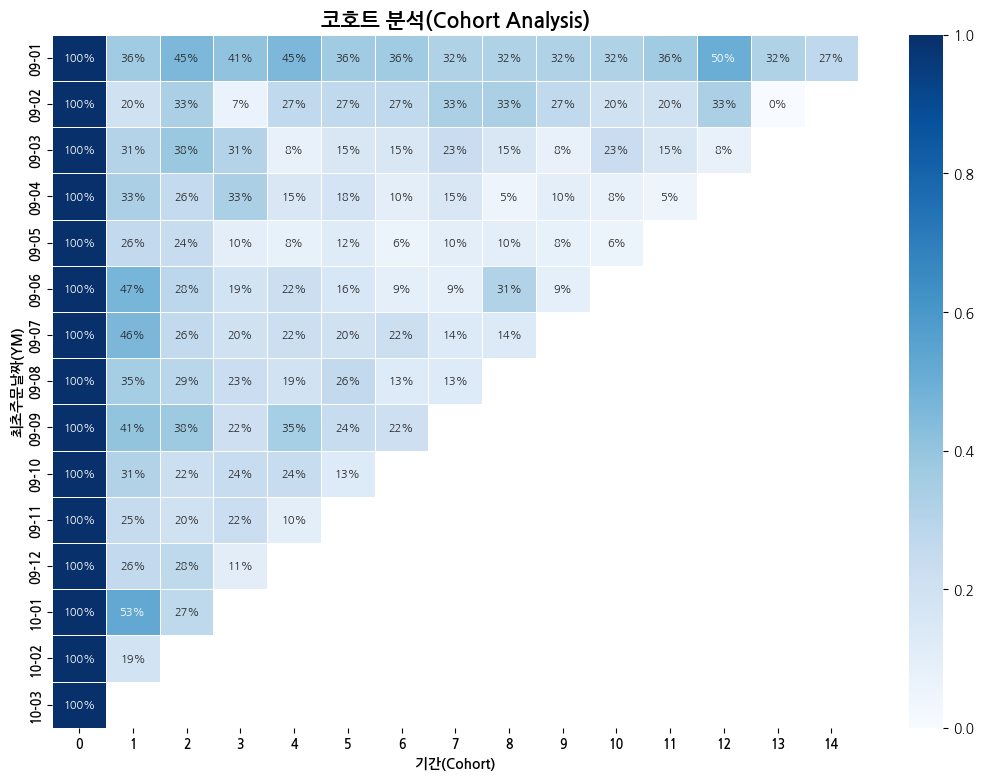

In [ ]:
# 코호튼 분석 결과 시각화
plot_option()
sns.heatmap(user_retention, annot=True, fmt='.0%', linewidths=.5, cmap='Blues', annot_kws={"size": 8})
plt.show()

In [ ]:
# 코호트 분석을 통해 09년 2월부터 10년 3월까지 유지율(리텐션)을 분석했다.

# 보편적으로 코호트 분석을 통해 유지율을 분석하면, 두 가지 관점을 분석한다.
# 첫번째, '같은 시간이 지난 후 코호트 간 활성 고객 수'를 비교하여, 시간 흐름에 따라 얼마나 고객이 유지되는지를 확인할 수 있다.
# 이를 통해, 1~3일의 코호트 시간은 타 시간에 비해 비교적 유지율이 좋은 것을 확인했다.
# 이에, 고객 유입을 위한 전략보다 기존 고객을 유지하기 위한 전략을 취할 필요가 있다 판단된다.


# 두번째, '같은 시간대 코호트 간 활성 고객 수'를 비교하여, 동날짜에 대한 고객 유지율을 확인할 수 있다.
# 이를 통해, 시간이 흘러도 09년 1~2월의 가입 고객들의 유지율이 좋은 것을 확인했다.
# 이에, 해당 일에 가입한 고객의 상세 분석을 통해 타 일자와 다른 고객 패턴을 확인할 필요가 있다 판단된다.

___